# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

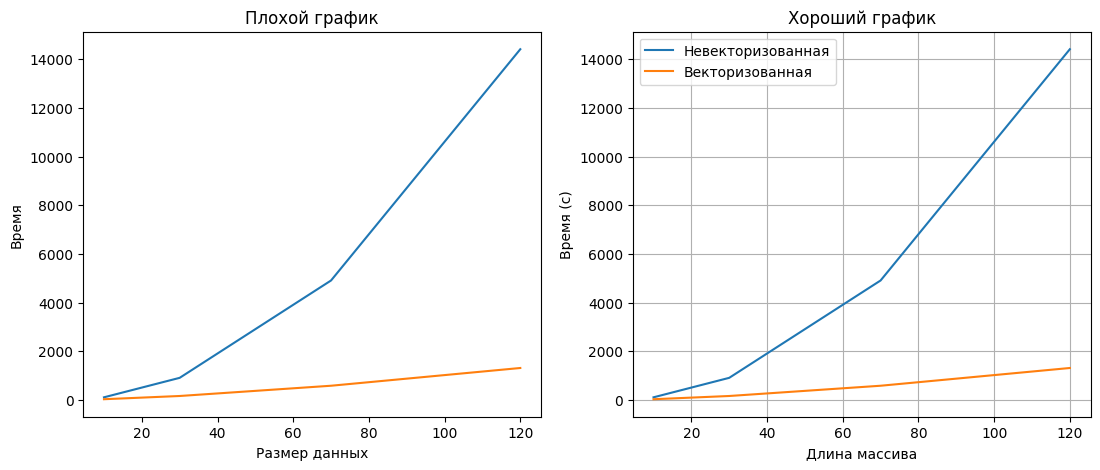

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

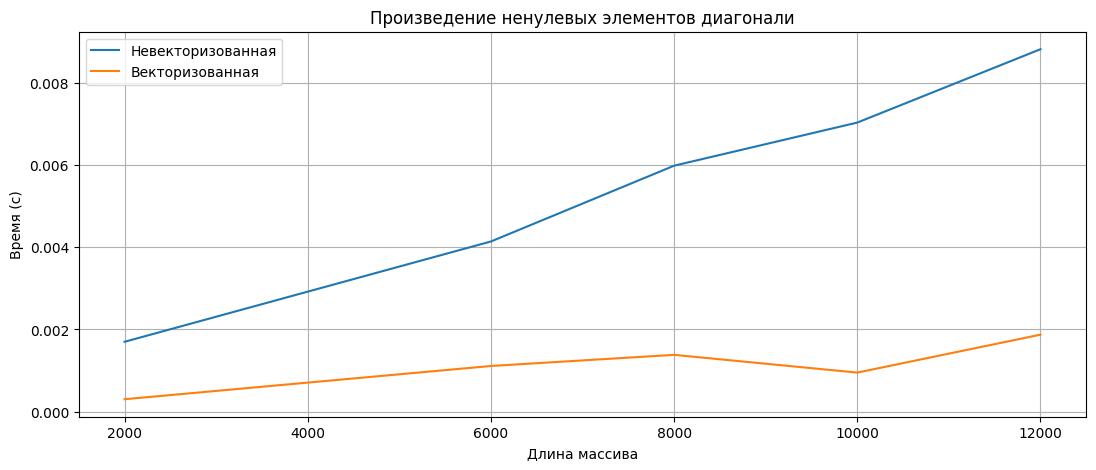

In [ ]:
# code here
import time
import numpy as np

def diagNonVec(a):
  res = 1
  k = min(len(a), len(a[0]))
  for i in range(k):
    if a[i][i] != 0:
      res *= a[i][i]
  return res

def diagVec(a):
  return np.prod(np.diag(a)[np.diag(a)!= 0])

#x = np.array([[0, 0, 1], [2, 0, 2], [3, 0, 0], [4, 4, 4]])
#print(diagNonVec(x))
#print(diagVec(x))

import matplotlib.pyplot as plt
import random
%matplotlib inline

time_non_vectorized = []
time_vectorized = []
data_size = [2000, 6000, 8000, 10000, 12000]

for k in data_size:
  x = [[np.random.rand() for i in range(k)] for j in range(k)]
  x_vect = np.array(x)

  start_time1 = time.time()
  diagNonVec(x)
  end_time1 = time.time()
  time_non_vectorized.append(end_time1 - start_time1)

  start_time2 = time.time()
  diagVec(x_vect)
  end_time2 = time.time()
  time_vectorized.append(end_time2 - start_time2)

time_vectorized = np.array(time_vectorized)
time_non_vectorized = np.array(time_non_vectorized)

f, ax = plt.subplots(1, 1, figsize=(13, 5))
ax.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax.plot(data_size, time_vectorized, label=u"Векторизованная")
ax.set_title(u"Произведение ненулевых элементов диагонали")
ax.set_xlabel(u"Длина массива")
ax.set_ylabel(u"Время (с)")
ax.grid()
ax.legend()

f.show()




* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


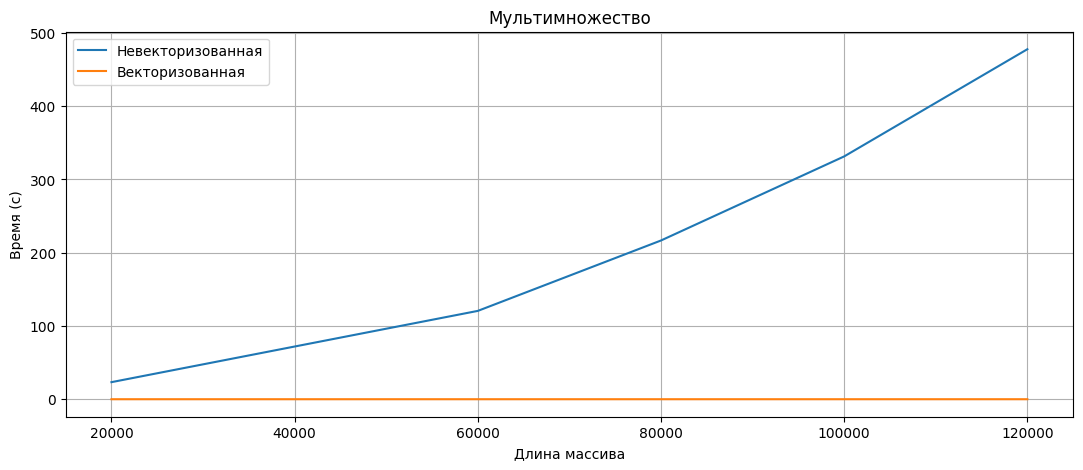

In [ ]:
# code here
import time
import numpy as np

#x = [1, 2, 2, 5]
#y = [5, 2, 1, 2]

def are_multisets_equal(x, y):
  flag = True
  for k in x:
    if x.count(k) != y.count(k):
      flag = False
  return flag

def are_multisets_vect(x, y):
  return np.array_equal(x, y)


import matplotlib.pyplot as plt
import random
%matplotlib inline

time_non_vectorized = []
time_vectorized = []
data_size = [20000, 60000, 80000, 100000, 120000]

for k in data_size:
  x = [np.random.rand() for i in range(k)]
  y = [np.random.rand() for i in range(k)]
  x_vect = np.array(x)
  y_vect = np.array(y)

  start_time1 = time.time()
  are_multisets_equal(x, y)
  end_time1 = time.time()
  time_non_vectorized.append(end_time1 - start_time1)

  start_time2 = time.time()
  are_multisets_vect(x_vect, y_vect)
  end_time2 = time.time()
  time_vectorized.append(end_time2 - start_time2)


np.array(time_non_vectorized)
np.array(time_vectorized)


f, ax = plt.subplots(1, 1, figsize=(13, 5))
ax.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax.plot(data_size, time_vectorized, label=u"Векторизованная")
ax.set_title(u"Мультимножество")
ax.set_xlabel(u"Длина массива")
ax.set_ylabel(u"Время (с)")
ax.grid()
ax.legend()

f.show()




* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

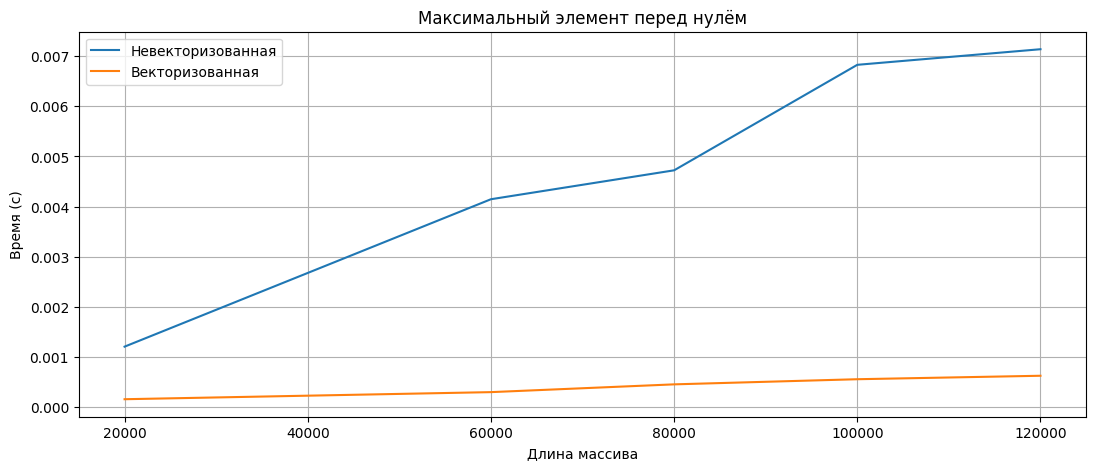

In [ ]:
# code here
import numpy as np
def max_after_zero(x):
  res = 0
  for i in range(len(x)):
    if x[i] == 0 and i < len(x)-1:
      res = max(x[i+1], res)
  return res

#x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
#print(max_after_zero(x))

def max_element_vect(x):
  return np.max(x[1:][np.nonzero(x[:-1] == 0)])


import matplotlib.pyplot as plt
import random
%matplotlib inline

time_non_vectorized = []
time_vectorized = []
data_size = [20000, 60000, 80000, 100000, 120000]

for k in data_size:
  x = [np.random.randint(0, 10) for i in range(k)]
  x_vect = np.array(x)

  start_time1 = time.time()
  max_after_zero(x)
  end_time1 = time.time()
  time_non_vectorized.append(end_time1 - start_time1)

  start_time2 = time.time()
  max_element_vect(x_vect)
  end_time2 = time.time()
  time_vectorized.append(end_time2 - start_time2)

time_vectorized = np.array(time_vectorized)
time_non_vectorized = np.array(time_non_vectorized)

f, ax = plt.subplots(1, 1, figsize=(13, 5))
ax.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax.plot(data_size, time_vectorized, label=u"Векторизованная")
ax.set_title(u"Максимальный элемент перед нулём")
ax.set_xlabel(u"Длина массива")
ax.set_ylabel(u"Время (с)")
ax.grid()
ax.legend()

f.show()




* **Задача 4**: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


In [ ]:
# code here


* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

In [ ]:
# code here



* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

In [ ]:
# code here

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.





# Эта домашка самая **лучшая** на свете. Отчёт по работе:


*   *векторизированные* программы работали быстрее, чем *невекторизированные*
*   также `библиотека numpy` проста в использовании
*   правда у меня почему-то ничего не работает **АООАААЫЕРААОППЫПВЫНАГЛ**
*   `;(`